<h1 style='text-align:center;border-radius:20px ;border:3px solid #c54E58 ;color : white;  padding: 15px; font-size: 15pt; background-color:blue'>DESIGN AND DEVELOPMENT OF A WEB-BASED BANK CUSTOMER CHURN PREDICTION PLATFORM USING ADVANCED MACHINE LEARNING MODELS TO ENHANCE CUSTOMER RETENTION STRATEGIES AND USER EXPERIENCE</h1>

<div style="border-radius:20px ;border:3px solid red ;color : Blue;  padding: 15px; font-size: 14pt; background-color: ; text-align:left">

This project aims to predict customer churn in banks, helping institutions identify at-risk customers and improve retention. By analyzing factors like credit scores, account balances, and customer activity, the model will provide insights to enhance loyalty strategies.

Using Python and machine learning, the project will develop a predictive model based on historical customer data. Feature engineering, exploratory data analysis (EDA), and visualization techniques will reveal key churn patterns. Advanced models, including ensemble learning, will ensure high accuracy.

The final output will be a web-based platform where banks can input customer data, receive churn predictions, and access retention recommendations. With real-time insights, banks can improve customer experience, reduce attrition, and optimize retention strategies.
<div/>

<div style="border-radius:20px ;border:3px solid red ;color : blue; padding: 15px; background-color: rgba(135, 206, 235, 0.4); text-align:left"> <a id="met"></a> <h2> Methodology for Analyzing Features</h2>
    
The methodology for analyzing features in this bank customer churn prediction project follows a structured approach to uncover key patterns and factors influencing customer attrition.

* **Data Overview:**

    - Inspect dataset for missing values, duplicates, and inconsistencies.
    - Analyze distributions of key features like credit scores, account balances, and tenure.
    - Identify outliers and assess data quality.
    
* **Feature Categorization:**

    - Classify features into demographic (e.g., age, gender, country), financial (e.g., balance, estimated salary), and engagement-related (e.g., active member status, number of products used).
    
* **Formulate Hypotheses:**

    - Define the null hypothesis (H0): There is no significant relationship between customer demographics, financial behaviors, and churn.
    - Test hypotheses to determine the strongest churn predictors.

* **Statistical Analysis:**

    - Correlation Analysis to assess relationships between numerical variables like credit score, account balance, and churn probability.
    - Chi-square tests for categorical variables to evaluate their association with churn.
    
* **Visual Analysis:**

    - Use heatmaps, bar charts, and scatter plots to explore trends in customer churn.
    - Box plots and histograms to detect skewness and distribution of key numerical features.
    
* **Observations & Insights:**

    - Summarize key findings from statistical and visual analyses.
    - Identify the most influential features driving customer churn for model training.
</div>

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b> DATA OVERVIEW </b></div>
<a id="data"></a>

In [1]:
# import dependencies
import pandas as pd
import numpy as np
from collections import Counter
import os

# For visualization
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns


# scikit-learn
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.utils import resample
from tensorflow.keras.models import load_model
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import optuna
import joblib
from sklearn.decomposition import PCA

# Classification metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc 

c:\Users\Idongesit Usoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset into the DataFrame as df
df = pd.read_csv("Bank Customer Churn Prediction.csv")
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Check the shape of the dataset
print(f"Dataframe dimensions: {df.shape}")

Dataframe dimensions: (10000, 12)


The dataset contains 10,000 rows entries and 12 columns

In [4]:
# Additional information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


There are no "nulls" in our dataframe.

#### Summary statistics for the numeric features

In [5]:
# Further statistical description of the dataset, givingthe mean, std, IQR, min & max values for each column
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From the summary statistics we can conclude that all features look OK. We do not see any extreme values for any feature.

In [6]:
# Check data types and unique values to confirm there are no unusual data entries or types
df.dtypes  ,   df.nunique()

(customer_id           int64
 credit_score          int64
 country              object
 gender               object
 age                   int64
 tenure                int64
 balance             float64
 products_number       int64
 credit_card           int64
 active_member         int64
 estimated_salary    float64
 churn                 int64
 dtype: object,
 customer_id         10000
 credit_score          460
 country                 3
 gender                  2
 age                    70
 tenure                 11
 balance              6382
 products_number         4
 credit_card             2
 active_member           2
 estimated_salary     9999
 churn                   2
 dtype: int64)

In [7]:
df.duplicated().sum()

0

To make dataframe easily readable we will drop features not needed for machine learning (customer_id)

In [8]:
# Drop unused features
df.drop(['customer_id'], axis=1, inplace=True)
print(f"Dataframe dimensions: {df.shape}")
df.head()

Dataframe dimensions: (10000, 11)


,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Distributions of Numeric Features

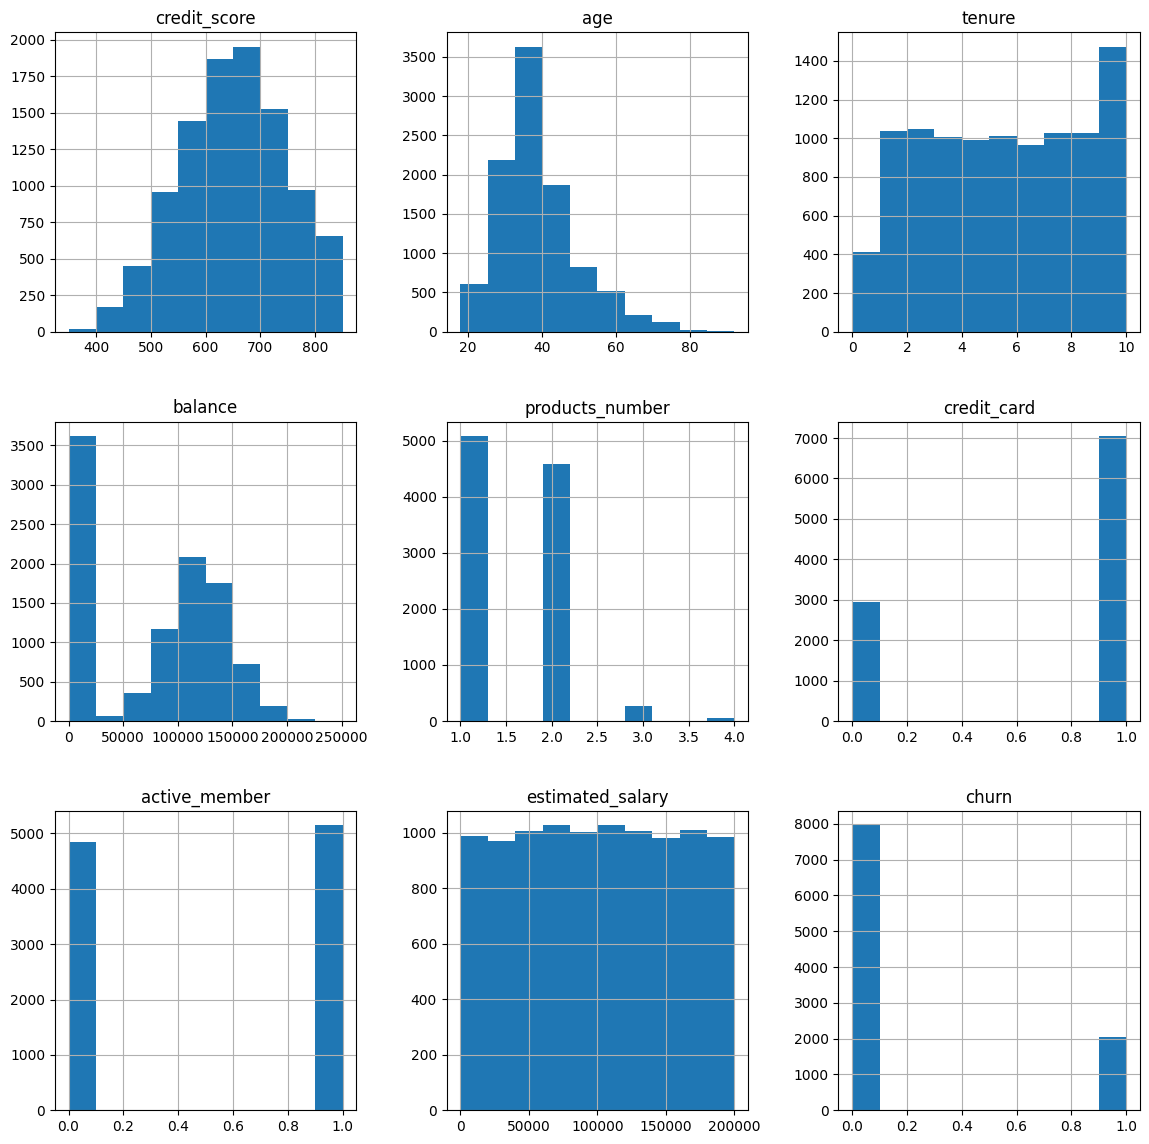

In [9]:
# Plot histogram grid
df.hist(figsize=(14,14))

plt.show()

## Histogram Findings:
Credit Score: Mostly normal around 600–700.

Age: Skewed right; most are 30–40. Older customers may churn differently.

Tenure: Evenly spread, but a spike at 10 years.

Balance: Bimodal—many have zero balance, others cluster around 50K–150K. Zero balance might indicate inactivity.

Products Number: Most have 1 or 2; few have 3+. Fewer products might mean higher churn.

Active Member: Majority are active; inactivity might predict churn.

Estimated Salary: Evenly spread, likely not a key churn factor.

Churn: Imbalanced—most didn’t churn, but a significant minority did.

### Distributions of Categorical Features

In [10]:
# Summarize categorical features
df.describe(include=['object'])

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


This shows us the number of unique classes for each feature. For example, there are more males (5457) than females. And France is most common of 3 geographies in our dataframe. There are no sparse classes.

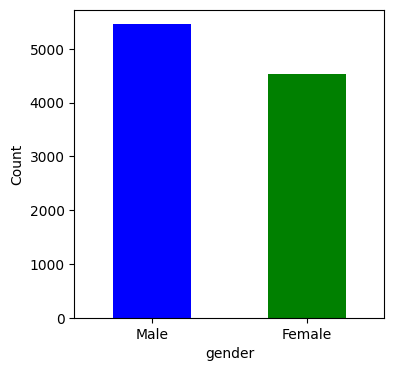

In our data sample there are more males than females.


Counter({'Male': 5457, 'Female': 4543})

In [11]:
# Bar plot for "gender"
plt.figure(figsize=(4,4))
df['gender'].value_counts().plot.bar(color=['b', 'g'])
plt.ylabel('Count')
plt.xlabel('gender')
plt.xticks(rotation=0)
plt.show()

print("In our data sample there are more males than females.")

Counter(df.gender) 

This bar chart shows the gender distribution of customers:

Males outnumber females, but not by a huge margin.

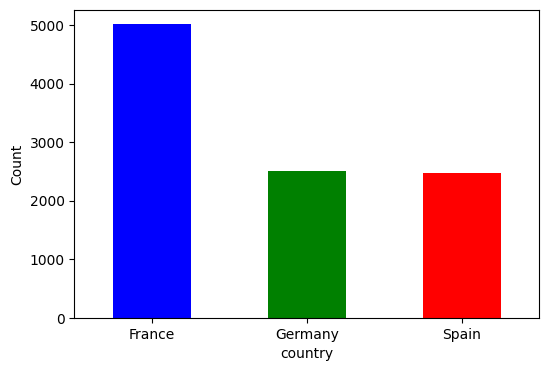

Counter({'France': 5014, 'Germany': 2509, 'Spain': 2477})

In [12]:
# Bar plot for "country"
plt.figure(figsize=(6,4))
df['country'].value_counts().plot.bar(color=['b', 'g', 'r'])
plt.ylabel('Count')
plt.xlabel('country')
plt.xticks(rotation=0)
plt.show()

Counter(df.country)

In [13]:
# Given distribution
country_counts = Counter({'France': 5014, 'Spain': 2477, 'Germany': 2509})
total_entries = sum(country_counts.values())

# Calculate percentages rounded to 2 decimal places
country_percentages = {country: round((count / total_entries) * 100, 2) for country, count in country_counts.items()}

country_percentages

{'France': 50.14, 'Spain': 24.77, 'Germany': 25.09}

Majority of customers are from France with percentage of about 50%, and from Germany and Spain around 25% each.

C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\948035878.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="churn", data=df, palette="coolwarm")


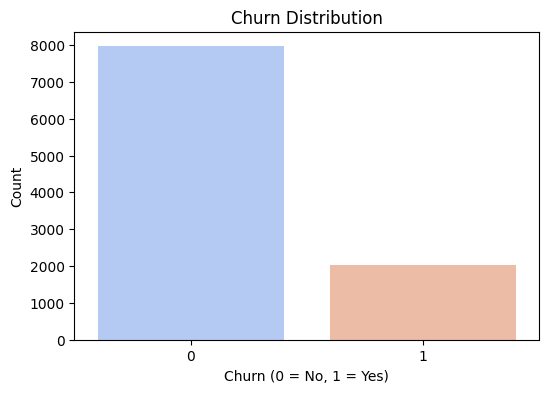

In [14]:
# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x="churn", data=df, palette="coolwarm")
plt.title("Churn Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

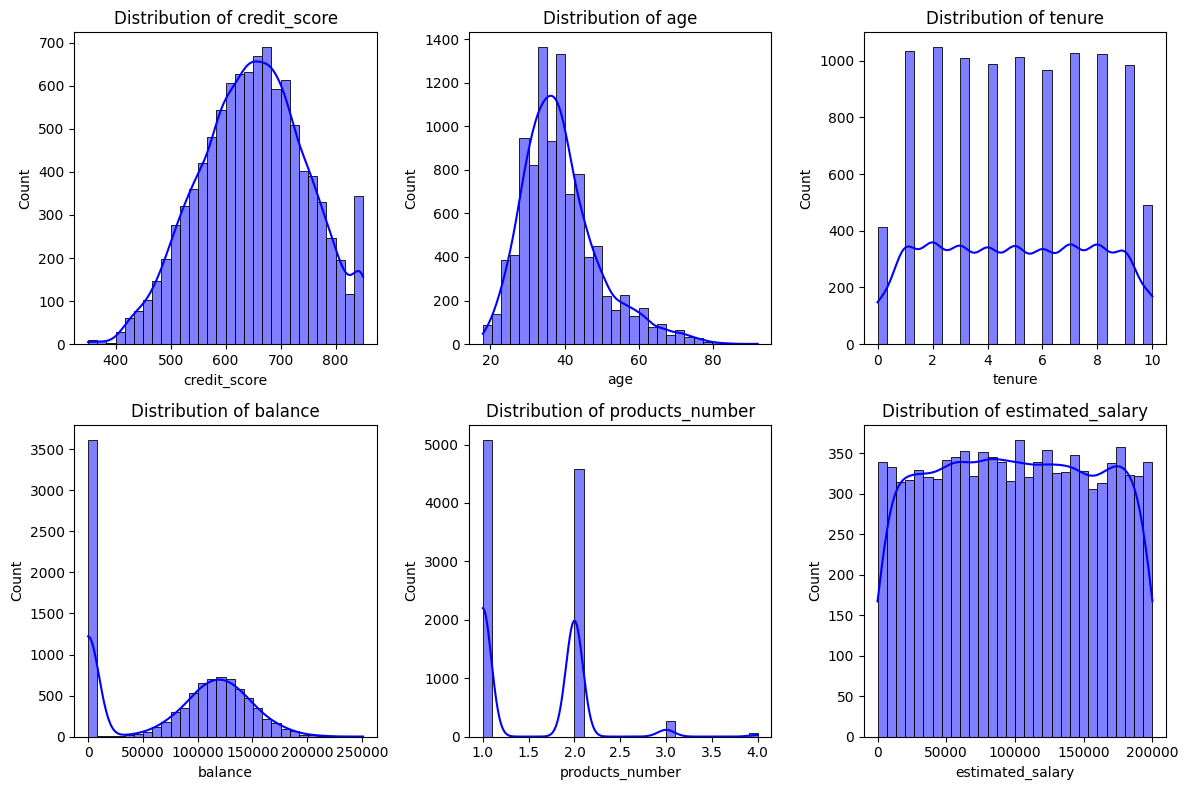

In [15]:
# Distribution of Numerical Features
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color="blue")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\2030343616.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="churn", y="age", data=df, palette="coolwarm")


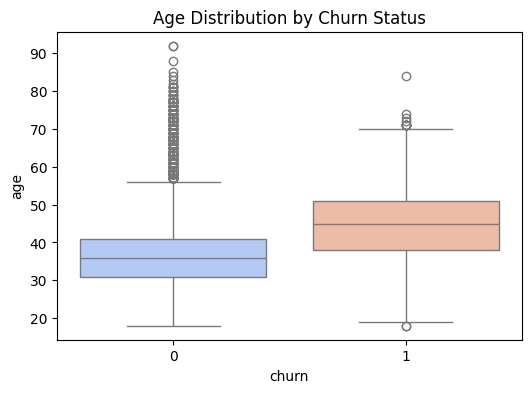

In [16]:
# Boxplot of age vs churn
plt.figure(figsize=(6, 4))
sns.boxplot(x="churn", y="age", data=df, palette="coolwarm")
plt.title("Age Distribution by Churn Status")
plt.show()

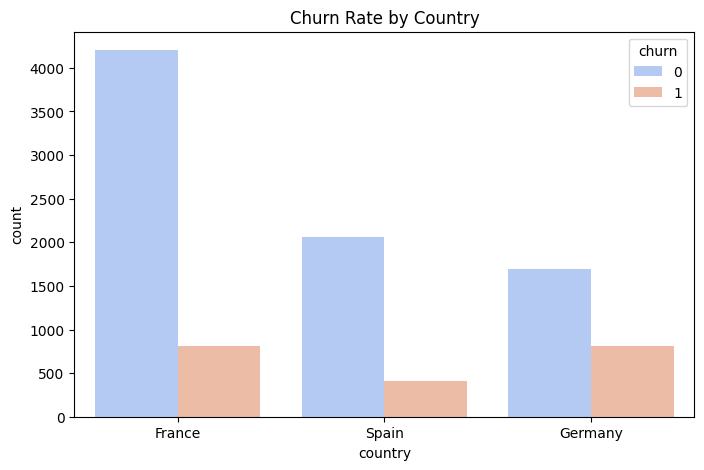

In [17]:
# Churn rate by country
plt.figure(figsize=(8,5))
sns.countplot(x="country", hue="churn", data=df, palette="coolwarm")
plt.title("Churn Rate by Country")
plt.show()

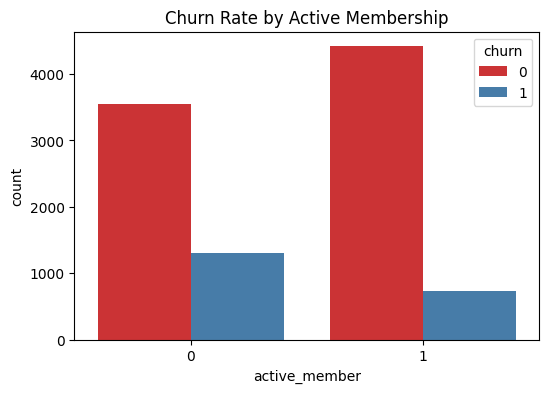

In [18]:
# Churn rate by active membership
plt.figure(figsize=(6,4))
sns.countplot(x="active_member", hue="churn", data=df, palette="Set1")
plt.title("Churn Rate by Active Membership")
plt.show()

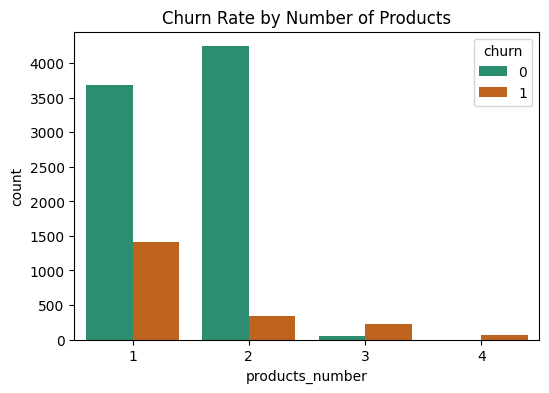

In [19]:
# Churn rate by number of products
plt.figure(figsize=(6,4))
sns.countplot(x="products_number", hue="churn", data=df, palette="Dark2")
plt.title("Churn Rate by Number of Products")
plt.show()

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b> UNIVARIATE ANALYSIS</b></div>
<a id="analysis"></a>

In [20]:
# 1. Skewness & Kurtosis
numerical_cols = ['credit_score', 'age', 'tenure', 'balance', 'products_number', 'estimated_salary']
for col in numerical_cols:
    skewness = df[col].skew()
    kurtosis = df[col].kurt()
    print(f"{col}: Skewness = {skewness:.2f}, Kurtosis = {kurtosis:.2f}")

credit_score: Skewness = -0.07, Kurtosis = -0.43
age: Skewness = 1.01, Kurtosis = 1.40
tenure: Skewness = 0.01, Kurtosis = -1.17
balance: Skewness = -0.14, Kurtosis = -1.49
products_number: Skewness = 0.75, Kurtosis = 0.58
estimated_salary: Skewness = 0.00, Kurtosis = -1.18


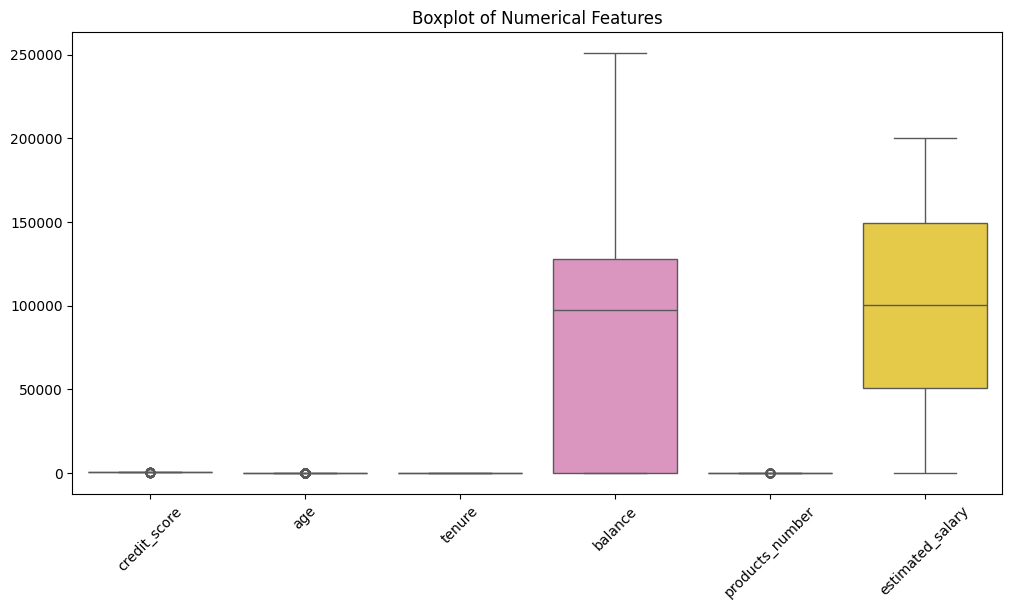

In [21]:
# 2. Boxplots (Outliers Detection)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols], palette="Set2")
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features")
plt.show()


C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\74677885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Pastel2")
C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\74677885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Pastel2")
C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\74677885.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette="Pastel2")
C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\74677885.py:6: FutureWarning: 



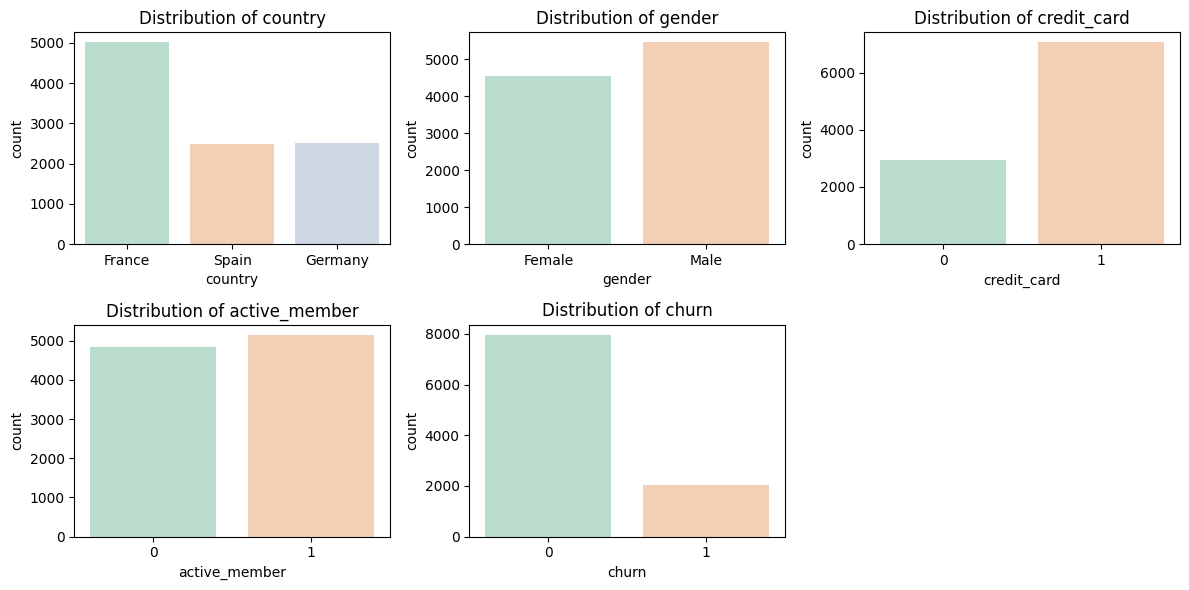

In [22]:
# 3. Countplot for Categorical Features
categorical_cols = ["country", "gender", "credit_card", "active_member", "churn"]
plt.figure(figsize=(12, 6))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=df[col], palette="Pastel2")
    plt.title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b>MULTIVARIATE ANALYSIS </b></div>
<a id="multivariate"></a>

## Color palette was set to "deep" for clearer visualization

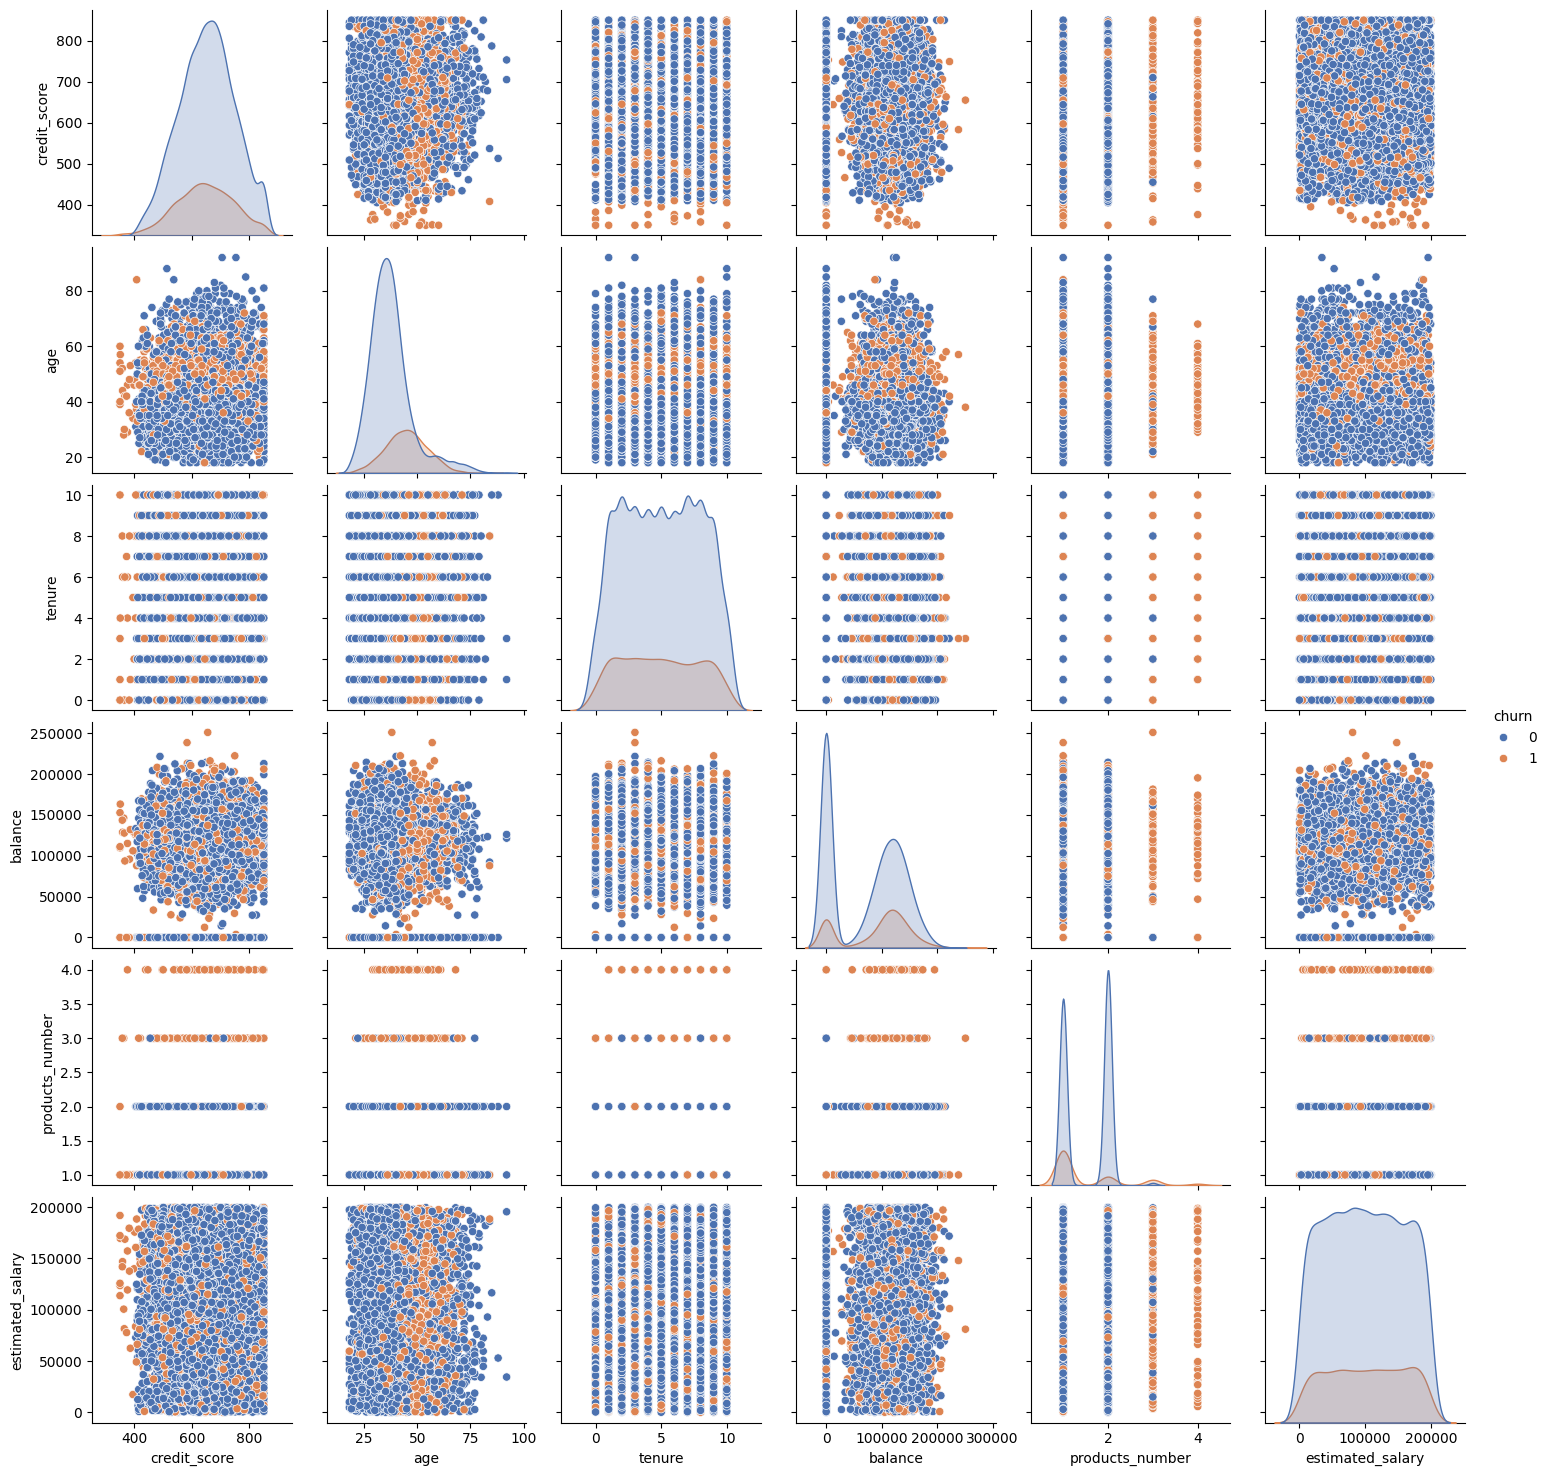

In [23]:
# 1. Pairplot (Numerical Variables & Churn)
sns.pairplot(df, hue="churn", vars=numerical_cols, palette="deep")
plt.show();

This pair plot visualizes relationships between features, with churn (0 = stayed, 1 = left) color-coded. Key insights:

Age & Churn: Higher churn among older customers.

Balance & Churn: Churners seem to cluster in the mid-to-high balance range.

Products Number & Churn: More churn in customers with 2+ products.

Credit Score & Churn: No clear trend, churn is spread across scores.

Estimated Salary & Churn: No strong correlation with churn.

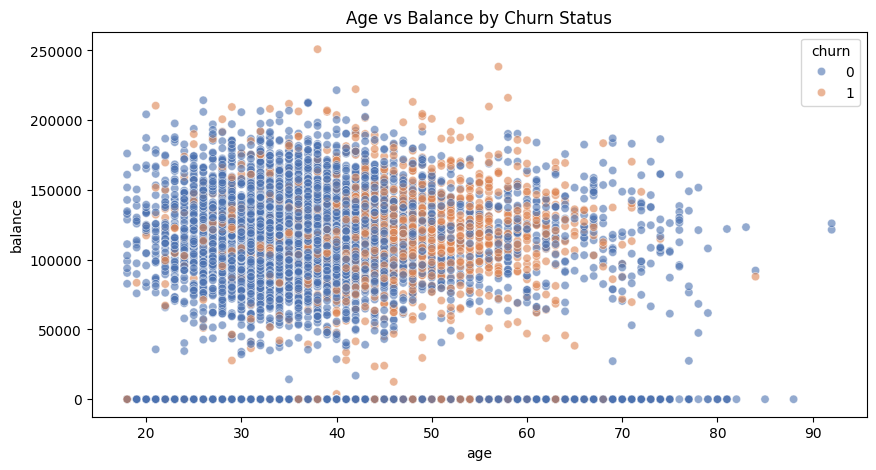

In [24]:
# 2. Churn Rate by Age & Balance
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["age"], y=df["balance"], hue=df["churn"], palette="deep", alpha=0.6)
plt.title("Age vs Balance by Churn Status")
plt.show()


This scatter plot shows Age vs. Balance, with churn status highlighted:

## Key Insights:

Higher churn (orange) in customers aged 40–60 with mid-to-high balances.

Younger customers (<30) rarely churn, even with low balances.

Churn is less common among elderly customers (70+).

Many customers with zero balance don’t churn, possibly inactive but not exiting.

In [25]:
# 3. Categorical Feature Relationships (Cramér’s V)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape)-1)))

print("\nCramér’s V for Country & Churn:", cramers_v(df["country"], df["churn"]))
print("Cramér’s V for Gender & Churn:", cramers_v(df["gender"], df["churn"]))
print("Cramér’s V for Credit Card & Churn:", cramers_v(df["credit_card"], df["churn"]))


Cramér’s V for Country & Churn: 0.17356708697916934
Cramér’s V for Gender & Churn: 0.10626315006669113
Cramér’s V for Credit Card & Churn: 0.006865404569611379


Cramér’s V values indicate the strength of association between categorical variables and churn:

**Country & Churn (0.1735)** → Weak but strongest influence among these three. Country might slightly impact churn.

**Gender & Churn (0.1063)** → Very weak correlation; gender is not a strong churn predictor.

**Credit Card & Churn (0.0069)** → Almost no correlation; credit card ownership doesn’t impact churn.

In [26]:
# Segment "churn" by gender and display the frequency and percentage within each class
grouped = df.groupby('gender')['churn'].agg(Count='value_counts')
grouped

Count
gender churn       
Female 0       3404
       1       1139
Male   0       4559
       1        898

In [27]:
# Calculate percentage within each class
dfgp = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgp.rename(columns={'Count': 'Percentage'}, inplace=True)
dfgp

Percentage
gender gender churn            
Female Female 0           74.93
              1           25.07
Male   Male   0           83.54
              1           16.46

In [28]:
# Reorganize dataframe for plotting percentage
dfgp = dfgp.pivot_table(values='Percentage', index='gender', columns=['churn'])
dfgp

churn,0,1
gender,,
Female,74.93,25.07
Male,83.54,16.46


In [29]:
# Reorganize dataframe for plotting count
dfgc = grouped
dfgc = dfgc.pivot_table(values='Count', index='gender', columns=['churn'])
dfgc

churn,0,1
gender,,
Female,3404.0,1139.0
Male,4559.0,898.0


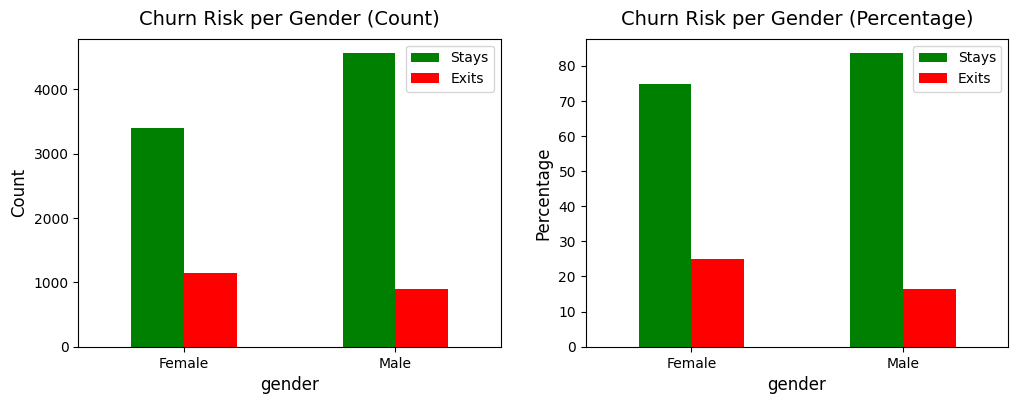

In [30]:
# Churn distribution by gender, count + percentage

labels= ['Stays', 'Exits']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

dfgc.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Gender (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('gender', size=12)


dfgp.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax2)
ax2.legend(labels)
ax2.set_title('Churn Risk per Gender (Percentage)', fontsize=14, pad=10)
ax2.set_ylabel('Percentage',size=12)
ax2.set_xlabel('gender', size=12)

plt.show()

These charts compare churn rates between males and females:

More males than females overall, but female customers churn at a higher rate (~25% vs. ~15%).

Males are more likely to stay (higher retention percentage).

In [31]:
# Segment "Exited" by geography and display the frequency and percentage within each class
grouped = df.groupby('country')['churn'].agg(Count='value_counts')
grouped

Count
country churn       
France  0       4204
        1        810
Germany 0       1695
        1        814
Spain   0       2064
        1        413

In [32]:
# Reorganize dataframe for plotting count
dfgeoc = grouped
dfgeoc = dfgeoc.pivot_table(values='Count', index='country', columns=['churn'])
dfgeoc

churn,0,1
country,,
France,4204.0,810.0
Germany,1695.0,814.0
Spain,2064.0,413.0


In [33]:
# Reorganize dataframe for plotting count
dfgeoc = grouped
dfgeoc = dfgeoc.pivot_table(values='Count', index='country', columns=['churn'])
dfgeoc

churn,0,1
country,,
France,4204.0,810.0
Germany,1695.0,814.0
Spain,2064.0,413.0


In [34]:
# Calculate percentage within each class
dfgeop = grouped.groupby(level=[0]).apply(lambda g: round(g * 100 / g.sum(), 2))
dfgeop.rename(columns={'Count': 'Percentage'}, inplace=True)
dfgeop

Percentage
country country churn            
France  France  0           83.85
                1           16.15
Germany Germany 0           67.56
                1           32.44
Spain   Spain   0           83.33
                1           16.67

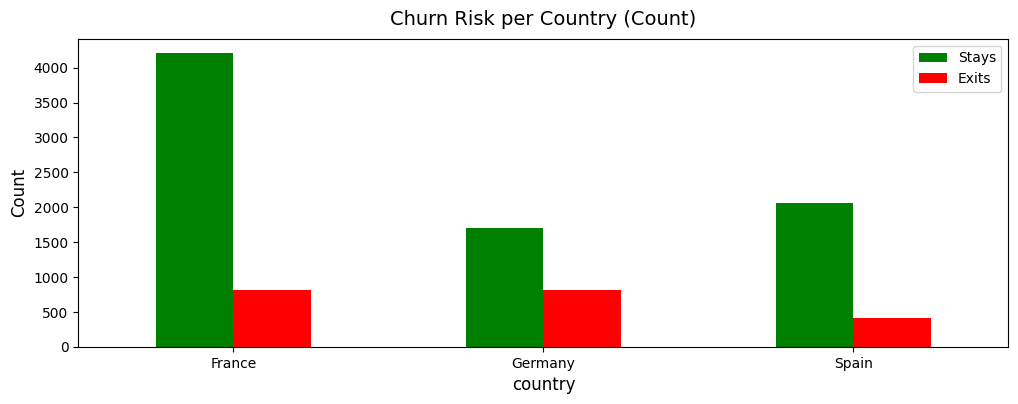

In [35]:
# Churn distribution by geography, count + percentage

labels= ['Stays', 'Exits']

fig, (ax1) = plt.subplots(1, figsize=(12, 4))

dfgeoc.plot(kind='bar',
          color=['g', 'r'],
          rot=0, 
          ax=ax1)
ax1.legend(labels)
ax1.set_title('Churn Risk per Country (Count)', fontsize=14, pad=10)
ax1.set_ylabel('Count',size=12)
ax1.set_xlabel('country', size=12)

plt.show()

## Distributions of the Target Feature

In [36]:
# Encode categorical variables
df = pd.get_dummies(df, columns=["country", "gender"], drop_first=True)


In [37]:
# Define Features and Target
X = df.drop(columns=["churn"])  
y = df["churn"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [38]:
# Variance Threshold (Removing low variance features)
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.01)  
X_train_var = selector.fit_transform(X_train)

C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\3241336655.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")


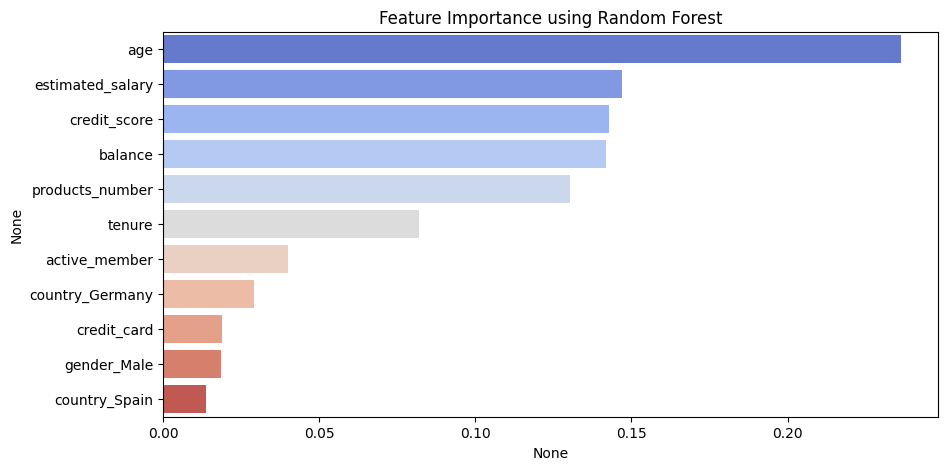

In [39]:
# Feature Importance using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10,5))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")
plt.title("Feature Importance using Random Forest")
plt.show()

## Feature Importance (Random Forest)
Age is the most important factor in predicting churn. Older customers might be at higher risk.

Estimated Salary, Credit Score, and Balance are also strong predictors.

Number of Products & Tenure have moderate influence.

Being an Active Member, Country, and Gender have lower impact.

Credit Card ownership has minimal effect, confirming previous findings.

C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\1209332403.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df_original, palette="pastel", ax=axes[0])
C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\1209332403.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=df_balanced, palette="pastel", ax=axes[1])


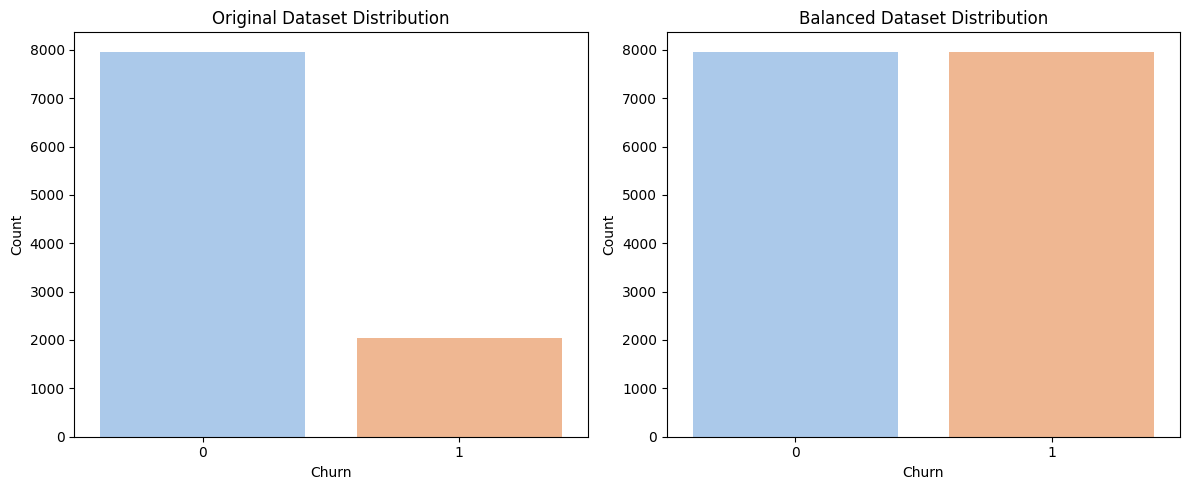

In [40]:
# Load the original dataset
df_original =  pd.read_csv("Bank Customer Churn Prediction.csv")

# Load the balanced dataset (change filename based on the method used)
df_balanced = pd.read_csv("balanced_dataset.csv")

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original dataset distribution
sns.countplot(x='churn', data=df_original, palette="pastel", ax=axes[0])
axes[0].set_title("Original Dataset Distribution")
axes[0].set_xlabel("Churn")
axes[0].set_ylabel("Count")

# Balanced dataset distribution
sns.countplot(x='churn', data=df_balanced, palette="pastel", ax=axes[1])
axes[1].set_title("Balanced Dataset Distribution")
axes[1].set_xlabel("Churn")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()


# <div style="padding:20px;color:white;margin:0;font-size:35px;text-align:center;display:fill;border-radius:10px;background-color:#c54E58;overflow:hidden; font-family: 'Lucida Console'"><b> MODEL TRAINING</b></div>
<a id="model"></a>

In [41]:
# Define Features and Target
X = df.drop(columns=["churn"])
y = df["churn"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize Models
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)
}

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred)
    }

# Step 1: Train on Imbalanced Dataset
imbalanced_results = {name: evaluate_model(model, X_train, y_train, X_test, y_test) for name, model in models.items()}

# Step 2: Balance Dataset using Bootstrap Resampling
X_minority = X_train[y_train == 1]
y_minority = y_train[y_train == 1]
X_minority_resampled, y_minority_resampled = resample(X_minority, y_minority, replace=True, 
                                                       n_samples=len(X_train[y_train == 0]), random_state=42)
X_train_resampled = np.vstack((X_train[y_train == 0], X_minority_resampled))
y_train_resampled = np.hstack((y_train[y_train == 0], y_minority_resampled))

# Step 3: Train on Balanced Dataset
balanced_results = {name: evaluate_model(model, X_train_resampled, y_train_resampled, X_test, y_test) for name, model in models.items()}

# Step 4: Hyperparameter Tuning for All Models
param_grids = {
    "XGBoost": {"learning_rate": [0.01, 0.1], "n_estimators": [100, 200]},
    "LightGBM": {"num_leaves": [31, 50], "learning_rate": [0.01, 0.1], "n_estimators": [100, 200]},
    "CatBoost": {"depth": [4, 6], "learning_rate": [0.01, 0.1], "iterations": [100, 200]},
    "Random Forest": {"n_estimators": [100, 200], "max_depth": [None, 10]},
    "Neural Network": {"hidden_layer_sizes": [(64, 32), (128, 64)], "max_iter": [500, 1000]}
}

optimized_models = {}
for name, param_grid in param_grids.items():
    grid_search = GridSearchCV(models[name], param_grid, cv=3, scoring='roc_auc')
    grid_search.fit(X_train_resampled, y_train_resampled)
    optimized_models[name] = grid_search.best_estimator_

# Evaluate Optimized Models
optimized_results = {name: evaluate_model(model, X_train_resampled, y_train_resampled, X_test, y_test) for name, model in optimized_models.items()}


c:\Users\Idongesit Usoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:05:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 1630, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001268 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019


c:\Users\Idongesit Usoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:05:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\Idongesit Usoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Idongesit Usoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
c:\Users\Idongesit Usoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:06:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
c:\Users\Idongesit Usoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:06:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa83

[LightGBM] [Info] Number of positive: 4247, number of negative: 4246
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 8493, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500059 -> initscore=0.000235
[LightGBM] [Info] Start training from score 0.000235
[LightGBM] [Info] Number of positive: 4246, number of negative: 4247
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000281 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 8493, number of used features: 11
[LightGBM] [Info] [binary:Bo

c:\Users\Idongesit Usoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:07:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 6370, number of negative: 6370
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003665 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


c:\Users\Idongesit Usoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Idongesit Usoro\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


In [42]:
# Convert Results to DataFrame
imbalanced_df = pd.DataFrame.from_dict(imbalanced_results, orient='index')
balanced_df = pd.DataFrame.from_dict(balanced_results, orient='index')
optimized_df = pd.DataFrame.from_dict(optimized_results, orient='index')

print("Imbalanced Dataset Results:")
print(imbalanced_df)
print("\nBalanced Dataset Results:")
print(balanced_df)
print("\nOptimized Model Results:")
print(optimized_df)

Imbalanced Dataset Results:
                Accuracy  Precision    Recall  F1 Score   ROC AUC
XGBoost           0.8530   0.696864  0.491400  0.576369  0.718393
LightGBM          0.8685   0.781250  0.491400  0.603318  0.728123
CatBoost          0.8700   0.797571  0.484029  0.602446  0.726321
Random Forest     0.8645   0.783333  0.461916  0.581144  0.714637
Neural Network    0.2990   0.191186  0.756757  0.305253  0.469402

Balanced Dataset Results:
                Accuracy  Precision    Recall  F1 Score   ROC AUC
XGBoost           0.8300   0.575621  0.626536  0.600000  0.754260
LightGBM          0.8220   0.549323  0.697789  0.614719  0.775762
CatBoost          0.8250   0.556660  0.687961  0.615385  0.773987
Random Forest     0.8540   0.679128  0.535627  0.598901  0.735484
Neural Network    0.5905   0.230366  0.432432  0.300598  0.531659

Optimized Model Results:
                Accuracy  Precision    Recall  F1 Score   ROC AUC
XGBoost           0.8240   0.556936  0.660934  0.604494  0.76

C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\796659763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df["ROC AUC"], ax=ax, palette=colors)
C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\796659763.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df.index, rotation=45)
C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\796659763.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.index, y=df["ROC AUC"], ax=ax, palette=colors)
C:\Users\Idongesit Usoro\AppData\Local\Temp\ipykernel_6276\796659763.py:10: UserWarning: set_ticklabels(

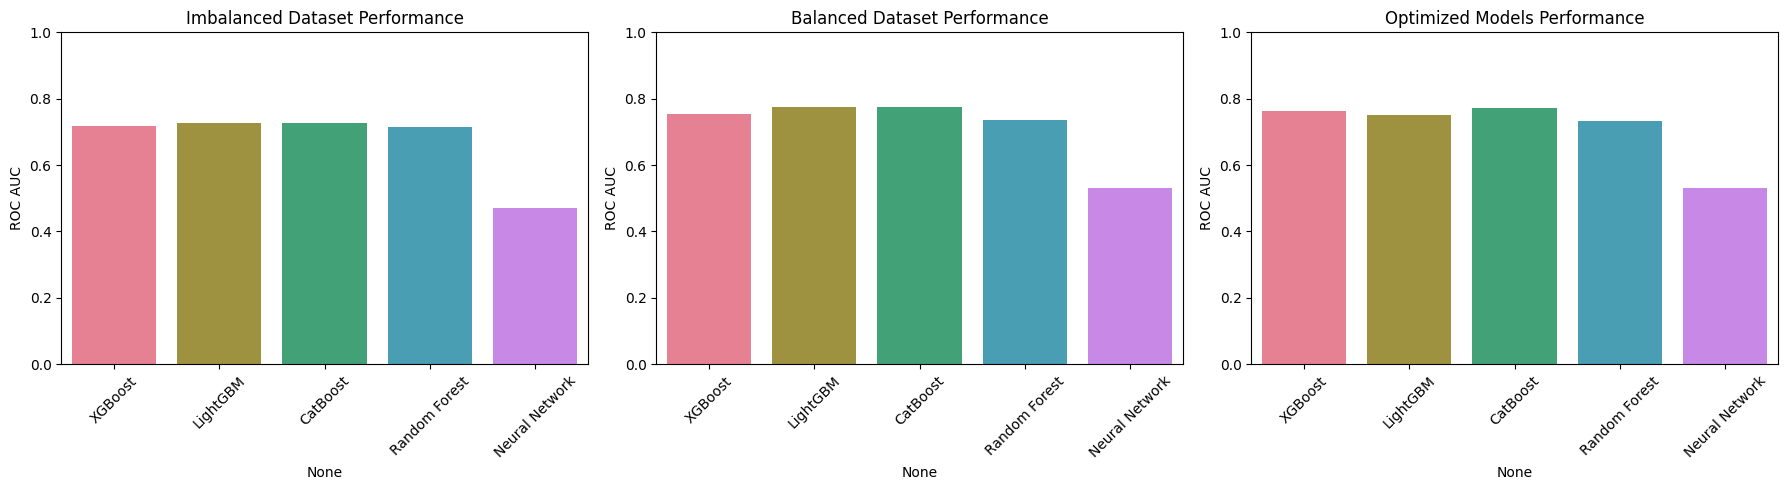

In [43]:
# Define Colors for Models
colors = sns.color_palette("husl", len(models))

# Visualize Model Performance
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, df, title in zip(axes, [imbalanced_df, balanced_df, optimized_df], 
                         ["Imbalanced Dataset", "Balanced Dataset", "Optimized Models"]):
    sns.barplot(x=df.index, y=df["ROC AUC"], ax=ax, palette=colors)
    ax.set_title(title + " Performance")
    ax.set_xticklabels(df.index, rotation=45)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

## **Final Recommendation: Use the Optimized Balanced Dataset**

Since customer churn prediction is often more concerned with minimizing false negatives (recall) to prevent revenue loss, the optimized balanced dataset is the best fit.

This dataset improves the model’s ability to detect actual churners while maintaining a reasonable level of precision. 
Using it will lead to better customer retention strategies by allowing banks to proactively engage at-risk customers. 

![alt text](image/Top_3_models.png)

Final Decision:

**CatBoost is the best model for deployment**

* It has the highest recall (0.705), which means it detects the most churners.

* It has the best ROC AUC (0.773), meaning it is the strongest at distinguishing between churners and non-churners.

* Its F1 score (0.605) is the highest, ensuring a good balance of precision and recall.

Why Not XGBoost or LightGBM?

* XGBoost performs well but has a lower recall (0.661) and ROC AUC (0.763) than CatBoost.

* LightGBM has higher accuracy (83.5%) but a lower recall (0.612), meaning it misses more actual churners.













**To get the top 3 models based on overall performance, the models are ranked based on an important metric such as ROC AUC, as it is a strong indicator of model performance in classification tasks.**

In [50]:
# Convert optimized_results dictionary to DataFrame
results_df = pd.DataFrame.from_dict(optimized_results, orient="index")

# Rank models based on ROC AUC Score (descending order)
top_models = results_df.sort_values(by="ROC AUC", ascending=False).head(3)

# Display Top 3 Models
print("Top 3 Best Models Based on Performance:")
print(top_models)



Top 3 Best Models Based on Performance:
          Accuracy  Precision    Recall  F1 Score   ROC AUC
CatBoost    0.8125   0.529520  0.705160  0.604847  0.772542
XGBoost     0.8240   0.556936  0.660934  0.604494  0.763298
LightGBM    0.8350   0.591449  0.611794  0.601449  0.751911


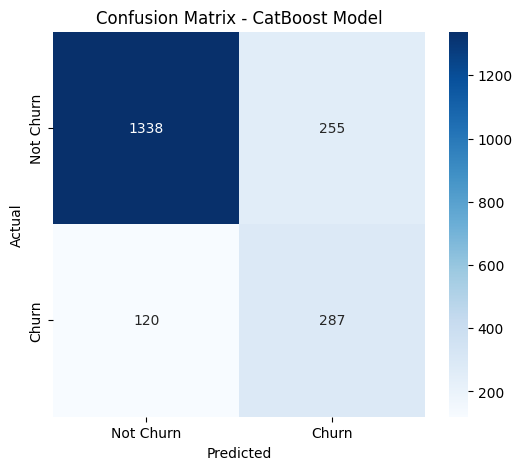

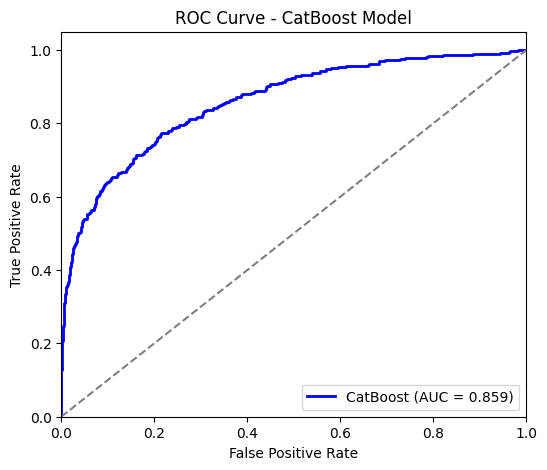

In [47]:
# Train the best model (CatBoost)
model = CatBoostClassifier(verbose=0, depth=6, learning_rate=0.1, iterations=200)
model.fit(X_train_resampled, y_train_resampled)

# Make predictions
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - CatBoost Model")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'CatBoost (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost Model')
plt.legend(loc="lower right")
plt.show()


## Save the Model

In [48]:
# Save the trained model to a file uing joblib

joblib.dump(model, "catboost_best_model.pkl")

['catboost_best_model.pkl']